In [1]:
# Setup necessary libraries

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import json

In [2]:
os.getcwd()

'C:\\Users\\Shru\\Documents\\Springboard\\Unit_27\\1481053515_ultimate_challenge\\ultimate_challenge'

In [3]:
# load data
path = 'C:\\Users\\Shru\\Documents\\Springboard\\Unit_27\\1481053515_ultimate_challenge\\ultimate_challenge'

# read json file into dictionary
with open(path+os.sep+'logins.json') as f:
    data = json.load(f)

# sample data
data['login_time'][0:25]

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52',
 '1970-01-01 20:26:05',
 '1970-01-01 20:31:03',
 '1970-01-01 20:34:46',
 '1970-01-01 20:36:34',
 '1970-01-01 20:39:25',
 '1970-01-01 20:40:37',
 '1970-01-01 20:34:58',
 '1970-01-01 20:43:59',
 '1970-01-01 20:47:46',
 '1970-01-01 20:46:34',
 '1970-01-01 20:56:07',
 '1970-01-01 20:49:12',
 '1970-01-01 20:59:06',
 '1970-01-01 20:59:59',
 '1970-01-01 21:15:01']

In [4]:
# convert dictionary to pandas DataFrame
df = pd.DataFrame.from_dict(data)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [5]:
# convert string object to datetime
df['login_time'] = pd.to_datetime(df['login_time'])

In [6]:
# check conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
# create a value column with integers counting up from 0 for further analysis
df['idx1'] = range(len(df))

In [8]:
# set datetime index to take advantage of pandas datetimeindex properties
df = df.set_index(df['login_time'], drop=True)
df = df.drop('login_time', axis=1)
df.head()

,idx1
login_time,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   idx1    93142 non-null  int32
dtypes: int32(1)
memory usage: 1.1 MB


In [46]:
# resample data by 15 min intervals and count number of "logins"
resamp = df.resample('15T').size()

# preview data
resamp.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, dtype: int64

In [80]:
resamp.tail()

login_time
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, dtype: int64

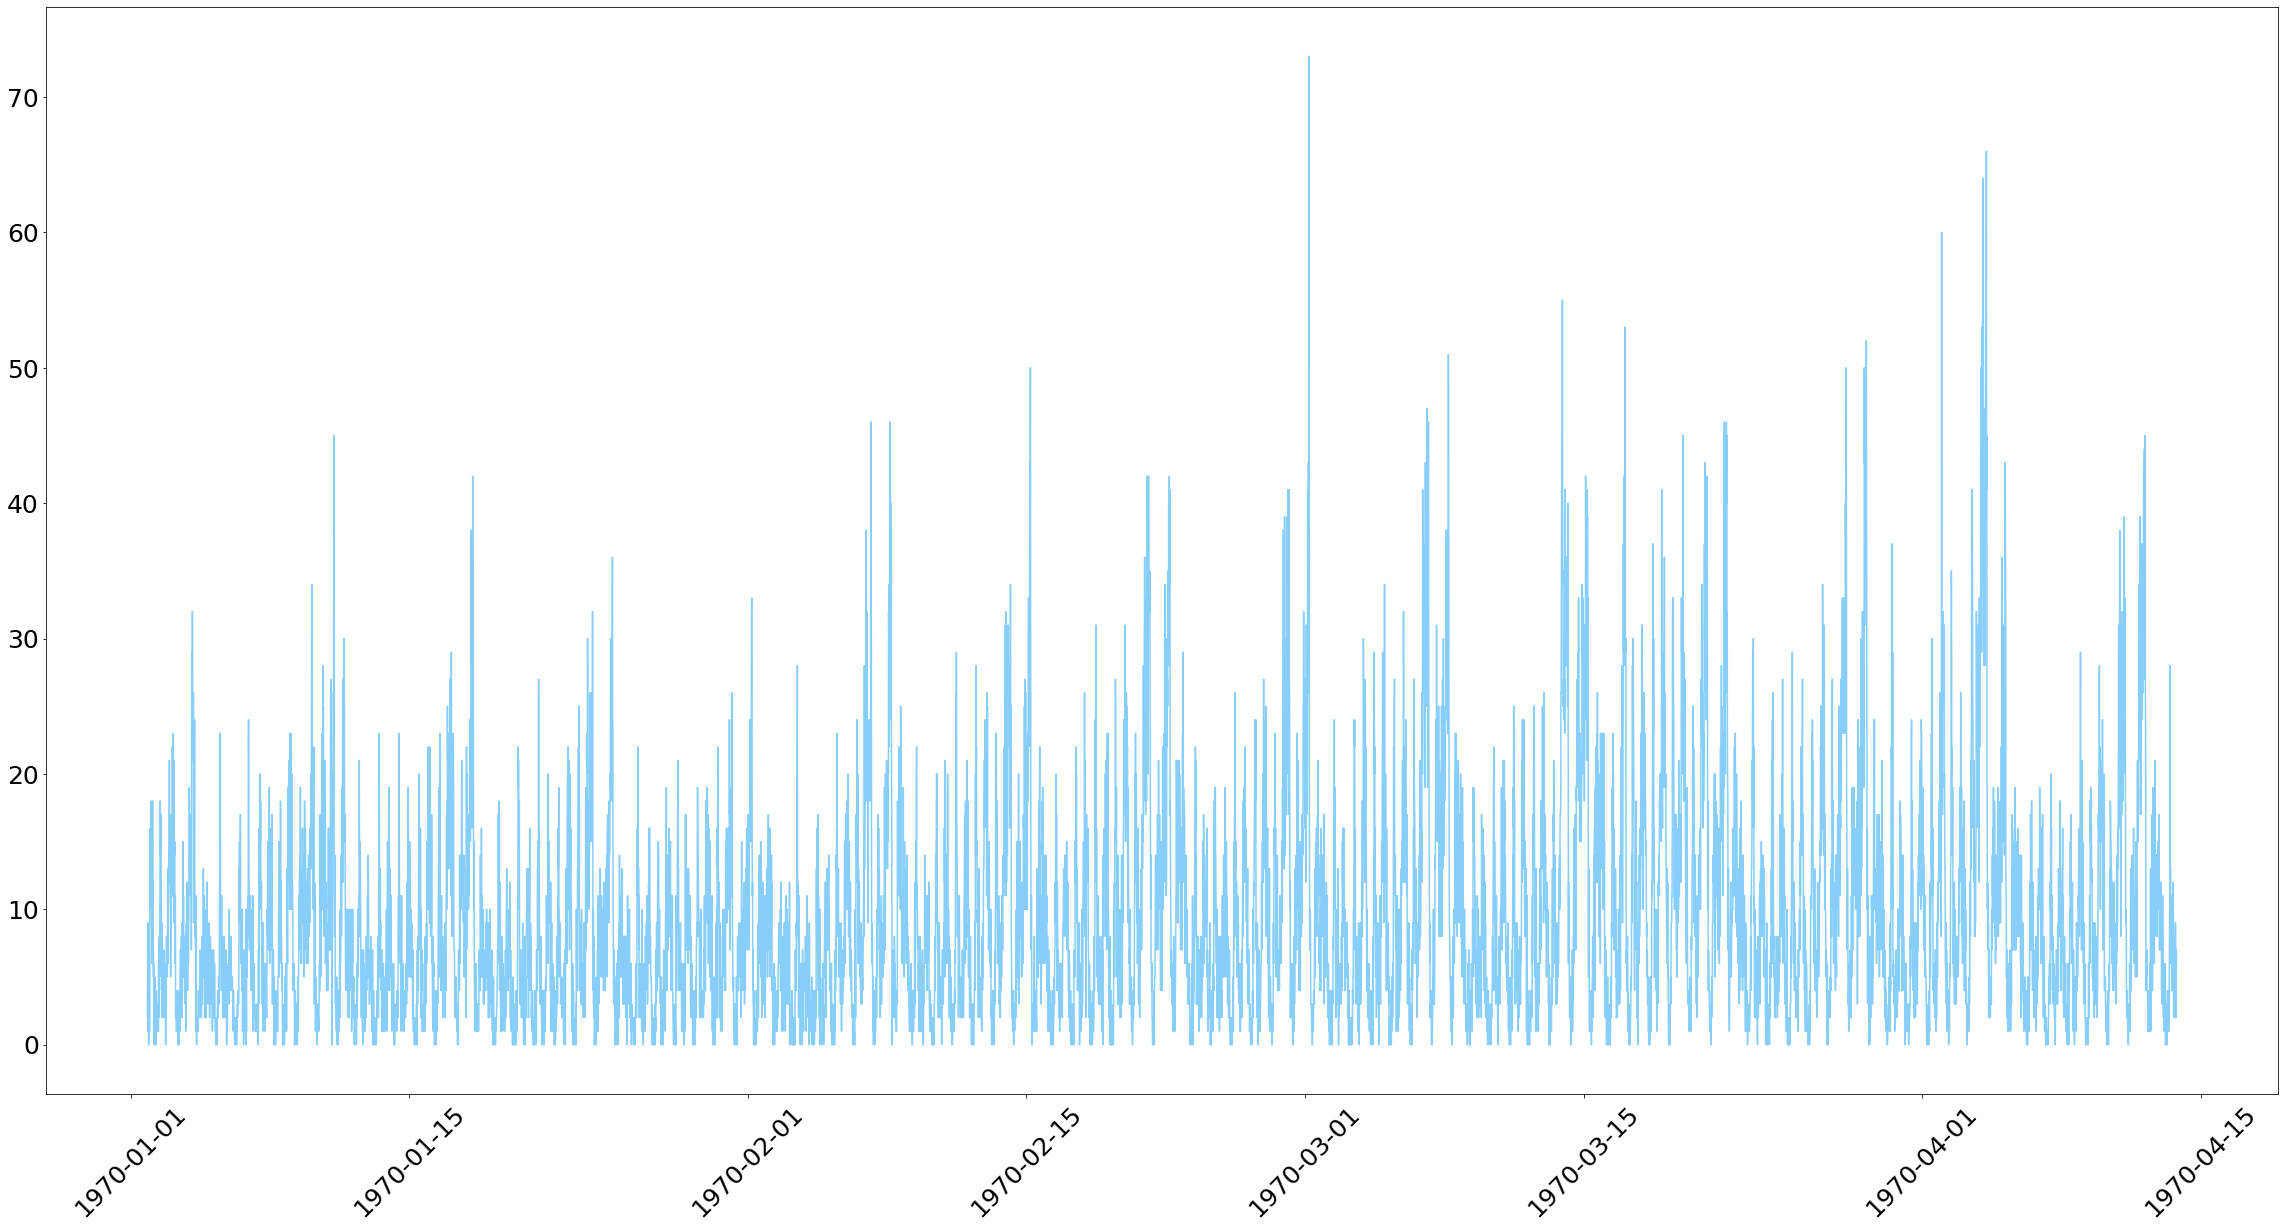

In [29]:
# plot raw resampled data to get a general view
fig = plt.figure(figsize=(40,20))
_ = plt.plot(resamp, color='lightskyblue')
_ = plt.xticks(fontsize=25, rotation=45)
_ = plt.yticks(fontsize=25)

The data appears to be cyclic in nature, however at this sampling rate the data is noisy. Lets sample a week and see if we can gain more insight into the data.

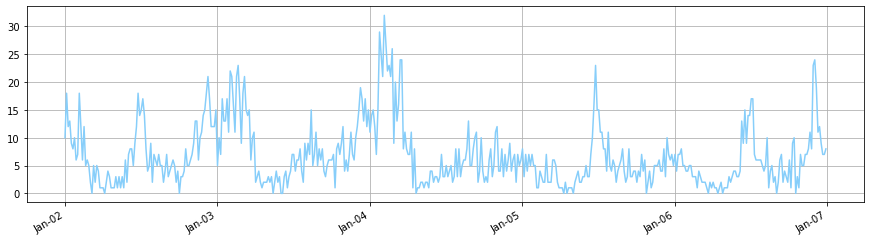

In [95]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(resamp['1970-01-02':'1970-01-06'], color='lightskyblue')

# set up values for ticks using matplotlib mdates feature
day = mdates.DayLocator()   
weekday = mdates.WeekdayLocator(byweekday=1) # every week starting MO
months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%b')
day_fmt = mdates.DateFormatter('%b-%d')

# format the ticks
ax.xaxis.set_major_locator(day)
#ax.xaxis.set_minor_locator(day)
ax.xaxis.set_major_formatter(day_fmt)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

From the plot above we can see that there are peaks at different times every day but it is still hard to see a pattern. The following plot shows the data resampled at a 1 day frequency which clearly illustrates the weekly cyclic nature of the data.

In [ ]:
#_ = df.resample('D').count().plot(figsize=(15,4), style='--')
#plt.show()

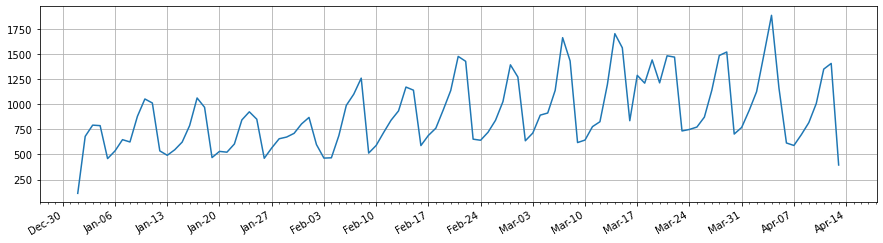

In [26]:
import matplotlib.dates as mdates
day = mdates.DayLocator()   # every week starting MO
weekday = mdates.WeekdayLocator(byweekday=1)
months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%b')
day_fmt = mdates.DateFormatter('%b-%d')

data = df.resample('D').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(15,4))
ax.plot('login_time', 'count', data=data)

# format the ticks
ax.xaxis.set_major_locator(weekday)
ax.xaxis.set_minor_locator(day)
ax.xaxis.set_major_formatter(day_fmt)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [21]:
df_hour = df.resample('H').size()
df_hour.head()

login_time
1970-01-01 20:00:00    24
1970-01-01 21:00:00     9
1970-01-01 22:00:00    21
1970-01-01 23:00:00    58
1970-01-02 00:00:00    53
Freq: H, dtype: int64

In [24]:
df_hour = df_hour.reset_index(name='count')

In [25]:
df_hour['hour'] = df_hour.login_time.dt.hour
df_hour.head()

,login_time,count,hour
0,1970-01-01 20:00:00,24,20
1,1970-01-01 21:00:00,9,21
2,1970-01-01 22:00:00,21,22
3,1970-01-01 23:00:00,58,23
4,1970-01-02 00:00:00,53,0


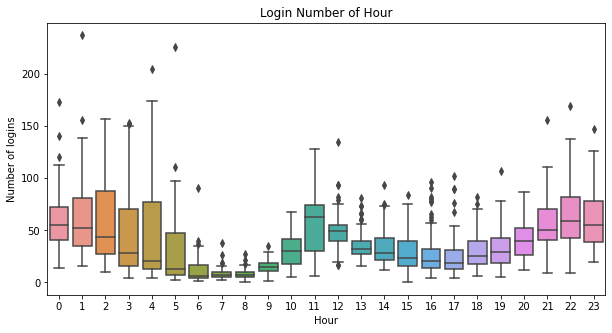

In [26]:
fig = plt.figure(figsize=(10,5))
_ = sns.boxplot(x='hour', y='count', data=df_hour)
_ = plt.title("Login Number of Hour")
_ = plt.xlabel("Hour")
_ = plt.ylabel("Number of logins")
_ = plt.xticks(rotation=0)
plt.show()

The plot above shows us that there are cycles throughout the day with peaks midday and midnight to 2 am.

In [30]:
df_day = df.resample('D').size()
df_day = df_day.reset_index(name='count')
df_day['weekday'] = df_day.login_time.dt.weekday
df_day.head()

,login_time,count,weekday
0,1970-01-01,112,3
1,1970-01-02,681,4
2,1970-01-03,793,5
3,1970-01-04,788,6
4,1970-01-05,459,0


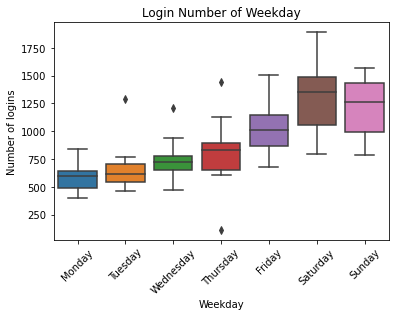

In [31]:
import calendar
ax = sns.boxplot(x='weekday', y='count', data=df_day)
_ = plt.title("Login Number of Weekday")
_ = plt.xlabel("Weekday")
_ = plt.ylabel("Number of logins")
_ = plt.xticks(rotation=45)
_ = ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

The plot below shows 15min intervals with an overlay of daily and weekly means showing an overall peak in March, along with daily cycles.

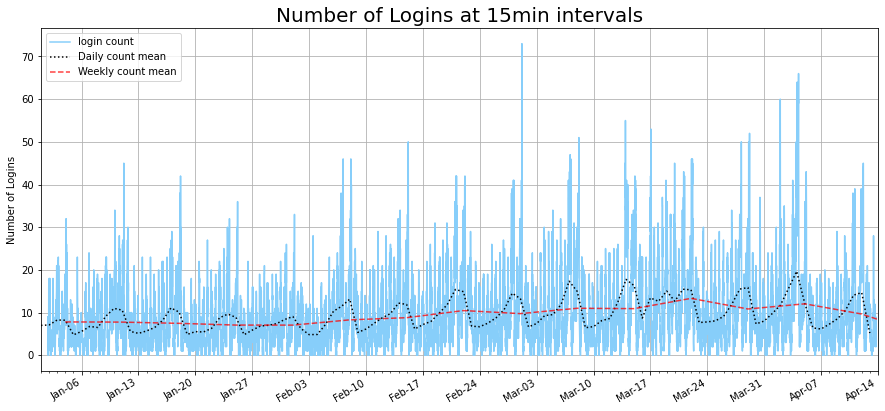

In [98]:
day = mdates.DayLocator()   # every week starting MO
weekday = mdates.WeekdayLocator(byweekday=1)
months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%b')
day_fmt = mdates.DateFormatter('%b-%d')


fig, ax = plt.subplots(figsize=(15,7))
ax.plot(resamp, color='lightskyblue',label='login count')

#ax = plt.xticks(fontsize=25, rotation=45)
#ax = plt.yticks(fontsize=25)

#ax2 = ax.twinx()
resamp2 = resamp.resample('D').mean()
#ax2.plot(resamp2, color='k')
ax.plot(resamp2, color='k', linestyle=':',label='Daily count mean')

resamp3 = resamp.resample('W').mean()
#ax2.plot(resamp2, color='k')
ax.plot(resamp3, color='red', alpha=0.75, linestyle='--', label='Weekly count mean')

# format the ticks
ax.xaxis.set_major_locator(weekday)
ax.xaxis.set_minor_locator(day)
ax.xaxis.set_major_formatter(day_fmt)

# round to nearest days.
datemin = np.datetime64('1970-01-01 20:00:00', 'D')
datemax = np.datetime64('1970-04-13 18:45:00', 'D') + np.timedelta64(1, 'D')
ax.set_xlim(datemin, datemax)

ax.grid(True)

ax.set_ylabel('Number of Logins')
ax.set_title('Number of Logins at 15min intervals', fontsize=20)
ax.legend()
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.show()